### Data Science Programming 2

# Final Project 

## Tasks:
### Task 1 - Classification with prepared dataset (75% of mark)
### Task 2 - Clustering with any dataset (25% of mark)

## Marking scheme 
For Final:
1. Data and task presentation - 10%
2. Data Preprocessing - 20%
3. Model (variety, complexity, tunning) - 20%
4. Imbalance (approaching this issue) - 20%
5. Code quality - 10%
6. Results and Defence - 20%

*Note: add comments and description of the approaches that you use, for example, for resolving the problem of imbalanced data. Write descriptions of techniques that you apply, and you should understand them as well.*

## Task 1:
Мы постоянно работаем над улучшением качества своих продуктов и услуг для роста абонентской базы и минимизации оттока. В своей работе мы используем персональный подход к абонентам.
Для снижения оттока компания использует разные каналы коммуникации с клиентами. Каждое предложение должно быть адресовано определенной целевой группе. В этом задании вам предстоит по имеющимся данным попытаться определить абонентов, которые уйдут в отток.

**Что имеем**

Анонимизированные данные об абонентах: язык обслуживания абонента, тарифный план, информация об объёмах потребления различных услуг оператора и другие.
В файле data.csv содержится информация для построения модели.
Формат строк: 3 категориальных признака (C1, C2, C3), 23 числовых признака (N1, …, N23) и целевая переменная — TARGET.

**Что делать**

Описать этапы построения модели, построить модель, оценить ее и рассказать бизнесу как ее применять, то есть нужна бизнес-интерпретация. 

*Note: this is how the task was originally structured, you can use it as a guidance.*

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier,BaggingClassifier,ExtraTreesClassifier,GradientBoostingClassifier,RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix
from sklearn.linear_model import SGDClassifier

import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae

In [2]:
df = pd.read_csv('task1.csv', sep=';', decimal=",")
df.head()

,C1,C2,C3,N1,N2,N3,N4,N5,N6,N7,...,N15,N16,N17,N18,N19,N20,N21,N22,N23,TARGET
0,3139363536333839,323531,33,83.74,3172.92,181.48,24.83,9.60,0.00,0.00,...,7,0,0,36,7,36,7,0,0,0
1,3437333830323633,343835,31,1.46,1273.88,92.11,211.78,28.98,5.75,13.85,...,18,5,6,52,12,57,18,0,0,0
2,3134323931353339,323531,33,0.00,31.95,763.19,48.13,77.22,9.33,4.90,...,24,18,6,46,18,64,24,0,0,0
3,3431333831343031,343433,31,117.49,529.19,1506.40,127.67,49.30,6.25,0.20,...,57,4,1,142,56,148,57,0,0,0
4,3233343933313234,343835,31,0.00,38.24,3493.18,389.98,72.78,16.72,4.28,...,28,17,5,69,23,86,28,0,0,0


## Data Preprocessing

In [3]:
df.shape

(514009, 27)

In [4]:
# df.loc[df[:] == 0]

In [5]:
df.isnull().sum()

C1        0
C2        0
C3        0
N1        0
N2        0
N3        0
N4        0
N5        0
N6        0
N7        0
N8        0
N9        0
N10       0
N11       0
N12       0
N13       0
N14       0
N15       0
N16       0
N17       0
N18       0
N19       0
N20       0
N21       0
N22       0
N23       0
TARGET    0
dtype: int64

In [6]:
df.nunique()

C1        514009
C2            64
C3             3
N1         41280
N2        174054
N3        237938
N4         42917
N5         27573
N6          8139
N7          7537
N8         40539
N9         26504
N10        42915
N11        27552
N12         1104
N13          672
N14          633
N15          415
N16          236
N17          225
N18          565
N19          330
N20          632
N21          416
N22           49
N23           36
TARGET         2
dtype: int64

In [7]:
df.drop('C1', axis=1, inplace=True)

In [8]:
df.iloc[:,1:26].columns

Index(['C3', 'N1', 'N2', 'N3', 'N4', 'N5', 'N6', 'N7', 'N8', 'N9', 'N10',
       'N11', 'N12', 'N13', 'N14', 'N15', 'N16', 'N17', 'N18', 'N19', 'N20',
       'N21', 'N22', 'N23', 'TARGET'],
      dtype='object')

In [9]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler, StandardScaler
scaler = MinMaxScaler()

# apply scaler() to all the numeric columns 
df[:] = scaler.fit_transform(df)
df

,C2,C3,N1,N2,N3,N4,N5,N6,N7,N8,...,N15,N16,N17,N18,N19,N20,N21,N22,N23,TARGET
0,0.915675,1.0,0.002994,0.032742,0.000902,0.002700,0.001849,0.000000,0.000000,0.002701,...,0.005564,0.000000,0.000000,0.032462,0.006836,0.026746,0.005564,0.0,0.0,0.0
1,0.973704,0.0,0.000052,0.013146,0.000458,0.023025,0.005581,0.013013,0.013853,0.022409,...,0.014308,0.011628,0.012024,0.046889,0.011719,0.042348,0.014308,0.0,0.0,0.0
2,0.915675,1.0,0.000000,0.000330,0.003793,0.005233,0.014871,0.021114,0.004901,0.004220,...,0.019078,0.041860,0.012024,0.041479,0.017578,0.047548,0.019078,0.0,0.0,0.0
3,0.972555,0.0,0.004200,0.005461,0.007486,0.013881,0.009494,0.014144,0.000200,0.013059,...,0.045310,0.009302,0.002004,0.128043,0.054688,0.109955,0.045310,0.0,0.0,0.0
4,0.973704,0.0,0.000000,0.000395,0.017359,0.042400,0.014016,0.037838,0.004281,0.040598,...,0.022258,0.039535,0.010020,0.062218,0.022461,0.063893,0.022258,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
514004,0.886547,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1.0
514005,0.886547,0.0,0.000000,0.000000,0.000000,0.000000,0.000023,0.000000,0.000120,0.000000,...,0.000795,0.000000,0.002004,0.000000,0.000000,0.000000,0.000795,0.0,0.0,0.0
514006,0.973138,0.0,0.000000,0.000000,0.000000,0.000000,0.000245,0.000000,0.001270,0.000000,...,0.000795,0.000000,0.002004,0.000000,0.000000,0.000000,0.000795,0.0,0.0,0.0
514007,0.886547,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1.0


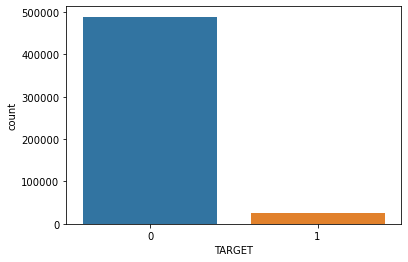

In [10]:
g = sns.countplot(df['TARGET'])
g.set_xticklabels(['0','1'])
plt.show()

## Model and Imbalance issue

In [11]:
X=df.drop('TARGET',axis=1)
y=df['TARGET']

In [12]:
X_train, X_test_main, y_train, y_test_main = train_test_split(X, y, test_size= 0.2, random_state=45)

In [13]:
# from imblearn.over_sampling import SMOTE

# smote = SMOTE()

# print('Initial train dataset shape:')
# print(y_train.value_counts())

# # fit predictor and target variable
# X_train, y_train = smote.fit_resample(X_train, y_train)

# print('Shape after resampling:')
# print(y_train.value_counts())

In [15]:
from imblearn.over_sampling import RandomOverSampler

#ros = RandomOverSampler(sampling_strategy=1) # Float
ros = RandomOverSampler(sampling_strategy="not majority") # String
X_train, y_train = ros.fit_resample(X_train, y_train)

In [16]:
# Again splitting train data into train and test
X_train1, X_test_of_train, y_train1, y_test_of_train = train_test_split(X_train, y_train, test_size= 0.2, random_state=45)

In [17]:
from sklearn import metrics

In [18]:
def forward_stepwise_selection(data, target, test_x,test_y):
    total_features = [[]]
    score_dict = {}
    remaining_features = [col for col in data.columns]
    for i in range(1, 16):
        best_score = 0; best_feature = None
        for feature in remaining_features:

            X = total_features[i-1] + [feature]
            model = DecisionTreeClassifier().fit(data[X], target)
#             score = metrics.precision_score(test_y, model.predict(test_x[X]), average='macro')
            score=classification_report(test_y, model.predict(test_x[X]), output_dict=True)['1.0']['precision']
#             report=classification_report(test_y, model.predict(test_x[X]))

            if score > best_score:
                best_score = score
                best_feature = feature
#                 best_report=report
        print(best_score)
#         print(best_report)
        total_features.append(total_features[i-1] + [best_feature])
        remaining_features.remove(best_feature)
        score_dict[i] = best_score
    return total_features,score_dict

In [19]:
total_features_fwd, score_dict_fwd = forward_stepwise_selection(X_train1,y_train1, X_test_main, y_test_main)

0.1777671553006161
0.18364961878791253
0.17866167997574042
0.22223865148602692
0.26833199033037874
0.2863903959367425
0.2948096046568033
0.29868027888446214
0.3026849037487335
0.3036055548477513
0.30608340772860604
0.30503064351378956
0.3035875016073036
0.3039090444557997
0.304554201411161


In [20]:
feat_names=total_features_fwd[-1]

In [21]:
feat_names

['N19',
 'C3',
 'N3',
 'N11',
 'C2',
 'N4',
 'N2',
 'N1',
 'N7',
 'N18',
 'N16',
 'N14',
 'N23',
 'N13',
 'N20']

In [27]:
# ['N19','C3','N3','N11','C2','N4','N2','N1','N7','N18','N16','N14','N23','N13','N20']

In [38]:
X_train1=X_train1[feat_names]
X_test_main=X_test_main[feat_names]
X_test_of_train=X_test_of_train[feat_names]
X_train=X_train[feat_names]

In [39]:
model1 = LogisticRegression()
model1.fit(X_train1, y_train1)

y_train_pred=model1.predict(X_test_of_train)
train_score=accuracy_score(y_test_of_train, y_train_pred)

y_test_pred=model1.predict(X_test_main)
test_score=accuracy_score(y_test_main, y_test_pred)



In [40]:
print("Train Accuracy Score: {}".format(train_score))
print("Test Accuracy Score: {}".format(test_score))
print(classification_report(y_test_main, y_test_pred))

acc_score=accuracy_score(y_test_main, y_test_pred)
report = classification_report(y_test_main, y_test_pred, output_dict=True)
macro_precision =  report['macro avg']['precision'] 
macro_recall = report['macro avg']['recall']    
macro_f1 = report['macro avg']['f1-score']
# print(report)

result = pd.DataFrame({'Algorithm used':['Logistic Regression'],'Accuracy score':[acc_score],
                       'Macro precision':[macro_precision], 'Macro recall':[macro_recall], 'Macro F1':[macro_f1]})

Train Accuracy Score: 0.7491687129118069
Test Accuracy Score: 0.6597439738526488
              precision    recall  f1-score   support

         0.0       0.99      0.65      0.78     97706
         1.0       0.11      0.85      0.20      5096

    accuracy                           0.66    102802
   macro avg       0.55      0.75      0.49    102802
weighted avg       0.94      0.66      0.76    102802



In [41]:
result

,Algorithm used,Accuracy score,Macro precision,Macro recall,Macro F1
0,Logistic Regression,0.659744,0.550123,0.749297,0.491155


In [42]:
model2 = DecisionTreeClassifier()
model2.fit(X_train1, y_train1)

y_train_pred=model2.predict(X_test_of_train)
train_score=accuracy_score(y_test_of_train, y_train_pred)

y_test_pred=model2.predict(X_test_main)
test_score=accuracy_score(y_test_main, y_test_pred)

print("Train Accuracy Score: {}".format(train_score))
print("Test Accuracy Score: {}".format(test_score))
print(classification_report(y_test_main, y_test_pred))


Train Accuracy Score: 0.9718129731941887
Test Accuracy Score: 0.9203031069434446
              precision    recall  f1-score   support

         0.0       0.97      0.94      0.96     97706
         1.0       0.30      0.46      0.37      5096

    accuracy                           0.92    102802
   macro avg       0.64      0.70      0.66    102802
weighted avg       0.94      0.92      0.93    102802



In [43]:
print(confusion_matrix(y_test_main, y_test_pred))

[[92254  5452]
 [ 2741  2355]]


In [44]:
print("Train Accuracy Score: {}".format(train_score))
print("Test Accuracy Score: {}".format(test_score))
print(classification_report(y_test_main, y_test_pred))

acc_score=accuracy_score(y_test_main, y_test_pred)
report = classification_report(y_test_main, y_test_pred, output_dict=True)
macro_precision =  report['macro avg']['precision'] 
macro_recall = report['macro avg']['recall']    
macro_f1 = report['macro avg']['f1-score']
result.loc[len(result)] = ['Decision Trees', acc_score , macro_precision, macro_recall, macro_f1]

Train Accuracy Score: 0.9718129731941887
Test Accuracy Score: 0.9203031069434446
              precision    recall  f1-score   support

         0.0       0.97      0.94      0.96     97706
         1.0       0.30      0.46      0.37      5096

    accuracy                           0.92    102802
   macro avg       0.64      0.70      0.66    102802
weighted avg       0.94      0.92      0.93    102802



In [45]:
from sklearn.model_selection import GridSearchCV
max_depth = [1, 3, 5, 7, 10, 15, 25, 26]
#min_samples_split = [2, 5, 10, 15, 100]
#min_samples_leaf = [1, 2, 5, 10]
max_features = [1, 2, 5, 10, 15,20,26]

model2 = DecisionTreeClassifier()
#Creating a dictionary for the hyper parameters
hyperT = dict(max_depth = max_depth, max_features=max_features)

#Applying GridSearchCV to get the best value for hyperparameters
gridT = GridSearchCV(model2, hyperT, cv = 3, verbose = 1, n_jobs = -1)
bestT = gridT.fit(X_train1, y_train1)

Fitting 3 folds for each of 56 candidates, totalling 168 fits


In [46]:
print('The best hyper parameters are: \n',gridT.best_params_)

The best hyper parameters are: 
 {'max_depth': 26, 'max_features': 10}


In [47]:
model3 = DecisionTreeClassifier(max_depth=26, max_features=10)
model3.fit(X_train1, y_train1)

y_train_pred=model3.predict(X_test_of_train)
train_score=accuracy_score(y_test_of_train, y_train_pred)

y_test_pred=model3.predict(X_test_main)
test_score=accuracy_score(y_test_main, y_test_pred)

print("Train Accuracy Score: {}".format(train_score))
print("Test Accuracy Score: {}".format(test_score))

Train Accuracy Score: 0.9420720789850624
Test Accuracy Score: 0.8834653022314741


In [48]:
acc_score=accuracy_score(y_test_main, y_test_pred)
report = classification_report(y_test_main, y_test_pred, output_dict=True)
macro_precision =  report['macro avg']['precision'] 
macro_recall = report['macro avg']['recall']    
macro_f1 = report['macro avg']['f1-score']
result.loc[len(result)] = ['Decision Trees with Tuning', acc_score , macro_precision, macro_recall, macro_f1]

In [49]:
model4 = RandomForestClassifier()
model4.fit(X_train1, y_train1)

y_train_pred=model4.predict(X_test_of_train)
train_score=accuracy_score(y_test_of_train, y_train_pred)

y_test_pred=model4.predict(X_test_main)
test_score=accuracy_score(y_test_main, y_test_pred)

print("Train Accuracy Score: {}".format(train_score))
print("Test Accuracy Score: {}".format(test_score))

Train Accuracy Score: 0.9833550746879476
Test Accuracy Score: 0.9413046438785238


In [50]:
print(classification_report(y_test_main, y_test_pred))

              precision    recall  f1-score   support

         0.0       0.97      0.97      0.97     97706
         1.0       0.41      0.44      0.43      5096

    accuracy                           0.94    102802
   macro avg       0.69      0.71      0.70    102802
weighted avg       0.94      0.94      0.94    102802



In [51]:
acc_score=accuracy_score(y_test_main, y_test_pred)
report = classification_report(y_test_main, y_test_pred, output_dict=True)
macro_precision =  report['macro avg']['precision'] 
macro_recall = report['macro avg']['recall']    
macro_f1 = report['macro avg']['f1-score']
result.loc[len(result)] = ['Random Forest', acc_score , macro_precision, macro_recall, macro_f1]

In [53]:
model5 = XGBClassifier()
model5.fit(X_train1, y_train1)

y_train_pred=model5.predict(X_test_of_train)
train_score=accuracy_score(y_test_of_train, y_train_pred)

y_test_pred=model5.predict(X_test_main)
test_score=accuracy_score(y_test_main, y_test_pred)

print("Train Accuracy Score: {}".format(train_score))
print("Test Accuracy Score: {}".format(test_score))

[19:46:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Train Accuracy Score: 0.831389400450174
Test Accuracy Score: 0.8178829205657477


In [54]:
acc_score=accuracy_score(y_test_main, y_test_pred)
report = classification_report(y_test_main, y_test_pred, output_dict=True)
macro_precision =  report['macro avg']['precision'] 
macro_recall = report['macro avg']['recall']    
macro_f1 = report['macro avg']['f1-score']
result.loc[len(result)] = ['XGBClassifier', acc_score , macro_precision, macro_recall, macro_f1]

In [58]:
model6 = BaggingClassifier() ExtraTreesClassifier
model6.fit(X_train1, y_train1)

y_train_pred=model6.predict(X_test_of_train)
train_score=accuracy_score(y_test_of_train, y_train_pred)

y_test_pred=model6.predict(X_test_main)
test_score=accuracy_score(y_test_main, y_test_pred)

print("Train Accuracy Score: {}".format(train_score))
print("Test Accuracy Score: {}".format(test_score))

Train Accuracy Score: 0.831389400450174
Test Accuracy Score: 0.9398066185482773


In [59]:
acc_score=accuracy_score(y_test_main, y_test_pred)
report = classification_report(y_test_main, y_test_pred, output_dict=True)
macro_precision =  report['macro avg']['precision'] 
macro_recall = report['macro avg']['recall']    
macro_f1 = report['macro avg']['f1-score']
result.loc[len(result)] = ['BaggingClassifierr', acc_score , macro_precision, macro_recall, macro_f1]

In [61]:
model7 = ExtraTreesClassifier() GradientBoostingClassifier
model7.fit(X_train1, y_train1)

y_train_pred=model7.predict(X_test_of_train)
train_score=accuracy_score(y_test_of_train, y_train_pred)

y_test_pred=model7.predict(X_test_main)
test_score=accuracy_score(y_test_main, y_test_pred)

print("Train Accuracy Score: {}".format(train_score))
print("Test Accuracy Score: {}".format(test_score))

Train Accuracy Score: 0.9851647227337835
Test Accuracy Score: 0.9435614093111029


In [62]:
acc_score=accuracy_score(y_test_main, y_test_pred)
report = classification_report(y_test_main, y_test_pred, output_dict=True)
macro_precision =  report['macro avg']['precision'] 
macro_recall = report['macro avg']['recall']    
macro_f1 = report['macro avg']['f1-score']
result.loc[len(result)] = ['ExtraTreesClassifier', acc_score , macro_precision, macro_recall, macro_f1]

In [63]:
model8 = GradientBoostingClassifier()
model8.fit(X_train1, y_train1)

y_train_pred=model8.predict(X_test_of_train)
train_score=accuracy_score(y_test_of_train, y_train_pred)

y_test_pred=model8.predict(X_test_main)
test_score=accuracy_score(y_test_main, y_test_pred)

print("Train Accuracy Score: {}".format(train_score))
print("Test Accuracy Score: {}".format(test_score))

Train Accuracy Score: 0.7937832514835277
Test Accuracy Score: 0.8068130970214588


In [64]:
acc_score=accuracy_score(y_test_main, y_test_pred)
report = classification_report(y_test_main, y_test_pred, output_dict=True)
macro_precision =  report['macro avg']['precision'] 
macro_recall = report['macro avg']['recall']    
macro_f1 = report['macro avg']['f1-score']
result.loc[len(result)] = ['GradientBoostingClassifier', acc_score , macro_precision, macro_recall, macro_f1]

In [66]:
model9 = SGDClassifier()
model9.fit(X_train1, y_train1)

y_train_pred=model9.predict(X_test_of_train)
train_score=accuracy_score(y_test_of_train, y_train_pred)

y_test_pred=model9.predict(X_test_main)
test_score=accuracy_score(y_test_main, y_test_pred)

print("Train Accuracy Score: {}".format(train_score))
print("Test Accuracy Score: {}".format(test_score))

Train Accuracy Score: 0.7323703192142419
Test Accuracy Score: 0.6038890293963153


In [67]:
acc_score=accuracy_score(y_test_main, y_test_pred)
report = classification_report(y_test_main, y_test_pred, output_dict=True)
macro_precision =  report['macro avg']['precision'] 
macro_recall = report['macro avg']['recall']    
macro_f1 = report['macro avg']['f1-score']
result.loc[len(result)] = ['SGDClassifier', acc_score , macro_precision, macro_recall, macro_f1]

## Results

In [75]:
result.sort_values(by='Accuracy score', ascending=False)

,Algorithm used,Accuracy score,Macro precision,Macro recall,Macro F1
6,ExtraTreesClassifier,0.943561,0.700556,0.700705,0.700631
3,Random Forest,0.941305,0.692551,0.705749,0.698885
5,BaggingClassifierr,0.939807,0.686875,0.705054,0.695451
1,Decision Trees,0.920303,0.636399,0.703164,0.661257
2,Decision Trees with Tuning,0.883465,0.602639,0.736235,0.631925
4,XGBClassifier,0.817883,0.583746,0.793338,0.594880
7,GradientBoostingClassifier,0.806813,0.580299,0.793187,0.586832
0,Logistic Regression,0.659744,0.550123,0.749297,0.491155
8,SGDClassifier,0.603889,0.544673,0.732839,0.459357


## Conclusion

ExtraTreesClassifier show the best result and we implement imbalance issue, some tuning, forwards selection and cleaning of data. We use about 9 model of classification. Result you can see above

## Task 2:
1. Select any dataset that will suit for clustering
2. Observe your data
3. Apply some data preparation
4. Apply clustering model
5. Visualise your obtained clusters